# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0383 Позолотин Константин и Смирнов Иван. Вариант №18.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения
Дискретные фильтры — системы, преобразующие спектр, выделяя определенные гармонические составляющие более высоким коэффициентом передачи:
$$y_n = \sum_{l=0}^{N}c_lx_{n-l}-\sum_{k=1}^{M}d_ky_{n-k}$$

Нерекурсивный фильтр - фильтр без обратной связи (КИХ):
$$y_n = \sum_{k=0}^{N}c_kx_{n-k}$$

При $x_n=e^{i\omega n}$ передаточная функция нерекурсивного фильтра имеет вид:

$$H(w)=\sum_{k=0}^{N}c_ke^{-i\omega k} \qquad y_n=H(w)x_n$$

При записи через циклическую частоту $f$ передаточная функция выглядит следующим образом:

$$\tilde{H}(f)=H(2\pi f)=H(\omega)$$

Сглаживание входного сигнала — апроксимация сигнала $s(t)$ функцией $y(t)$ по $N$ точкам, например методом наименьших квадратов:

$$\sum_{k=0}^{N}(s_k-y_k)^2 \Rightarrow min$$

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


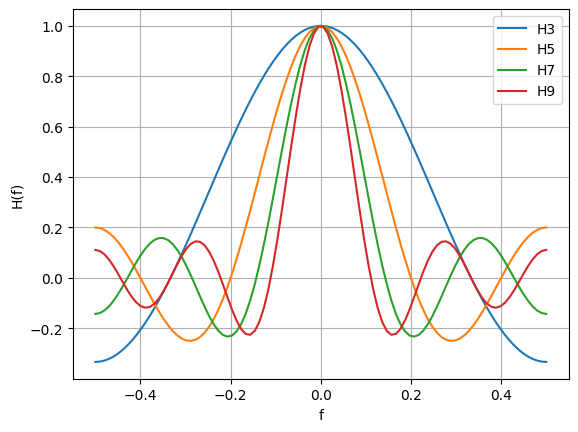

In [2]:
def s(f, n):
  return np.exp(1j*(2*np.pi*f)*n)

def H(n, f):
  return sum([s(f, i) for i in range(-(n // 2), n // 2 + 1)]) / n


for i in range(3, 10, 2):
  plt.plot(np.linspace( - 0.5,  0.5, 100), H(i, np.linspace( - 0.5,  0.5, 100)), label=f'H{i}')

plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid(True)
plt.show()

**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
Все фильтры без ослабления передают только сигнал постоянного уровня. Высокие частоты подавляются неравномерно

При увеличении числа точек наблюдается увеличение частоты колебаний, уменьшение амлитуды, график приближается к чему-то вроде единичного скачка в точке 0

### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выведем формулы H следующим образом:

$y(t) = A+Bt+Ct^2$

$F(A,B,C) = \sum_{k=-m}^{k=m}(s_k-A-Bk-Ck^2)^2 \Rightarrow \min$

$y_n = \frac1a \sum_{k=n-m}^{k=n+m}c_ks_k$

$H(\omega) = \frac1a \sum_{k=0}^{k=m}d_k \cos(k\omega)$

$d_k=c_k$ при $k=0$, $\qquad d_k=2c_k$ при $k \ne 0$

$\tilde{H}(f)=H(2\pi f)=\frac1a \sum_{k=0}^{k=m}d_k \cos(2k\pi f)$


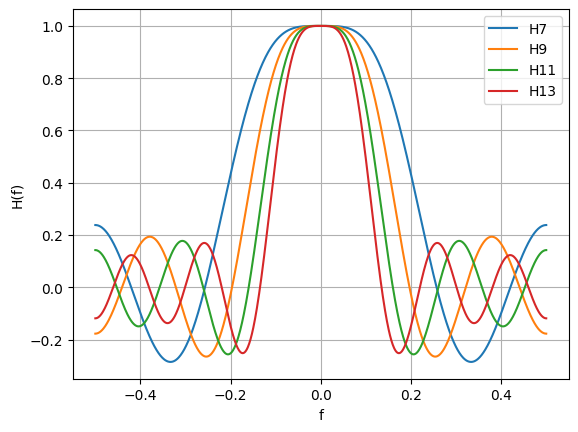

In [3]:
def H2(a, d, f):
  return sum([d[k]*np.cos(2*k*np.pi*f) for k in range(len(d))])/a

f = np.linspace(-0.5, 0.5, 1000)

plt.xlabel('f')
plt.ylabel('H(f)')
plt.plot(f, H2(21, [7, 12, 6, -4], f), label='H7')
plt.plot(f, H2(231, [59, 108, 78, 28, -42], f), label='H9')
plt.plot(f, H2(429, [89, 168, 138, 88, 18, -72], f), label='H11')
plt.plot(f, H2(143, [25, 48, 42, 32, 18, 0, -22], f), label='H13')
plt.legend()
plt.grid(True)
plt.show()

**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
Все фильтры без ослабления передают только сигнал постоянного уровня. Высокие частоты подавляются неравномерно

При увеличении числа точек наблюдается увеличение частоты колебаний, уменьшение амплитуды, график приближается к чему-то вроде единичного скачка в точке 0

### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Функция будет иметь вид:

$y(t) = A+Bt+Ct^2+Dt^3+Et^4$

$F(A,B,C,D,E) = \sum_{k=-m}^{k=m}(s_k-A-Bk-Ck^2-Dt^3-Et^4)^2 \Rightarrow \min$

$\tilde{H}(f)=H(2\pi f)=\frac1a \sum_{k=0}^{k=m}d_k \cos(2k\pi f)$

пересчитав коэффициенты получим:

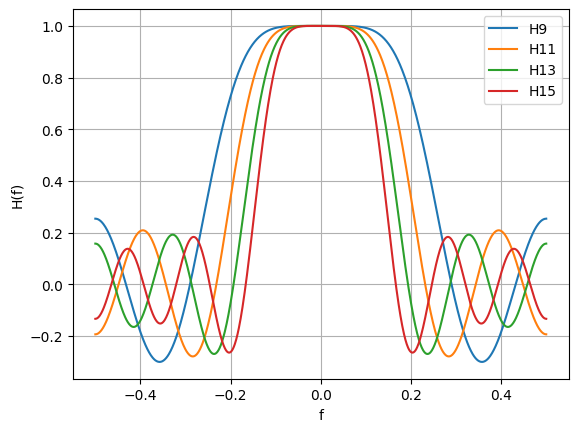

In [4]:
plt.xlabel('f')
plt.ylabel('H(f)')
plt.plot(f, H2(429, [179, 270, 60, -110, 30], f), label='H9')
plt.plot(f, H2(429, [143, 240, 120, -20, -90, 36], f), label='H11')
plt.plot(f, H2(2431, [677, 1200, 780, 220, -270, -396, 220], f), label='H13')
plt.plot(f, H2(46189, [11063, 20250, 15000, 7510, -330, -5874, -5720, 4290], f), label='H15')
plt.legend()
plt.grid(True)
plt.show()

Интерпретация аналогична

### 4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H (f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для каждого случая, зная $y_n$ найдем  $H(w) = \frac{y_n}{s_n} $ .
Затем $\tilde{H}(f) = H(2\pi f)$


* по 15 т.  $$y_n = \frac{1}{320}(-3s_{n-7} -6s_{n-6} -5s_{n-5}  +3s_{n-4} +21s_{n-3} +46s_{n-2} +67s_{n-1} +74s_{n} +67 s_{n+1} +46s_{n+2}  + ...)$$

* по 21 т.  $$y_n = \frac{1}{350}( -s_{n-10} -3s_{n-9}  -5s_{n-8}-5s_{n-7} -2s_{n-6} +6s_{n-5}  +18s_{n-4} +33s_{n-3} +47s_{n-2} +57s_{n-1} +60s_{n} +57 s_{n+1}  + ...)$$


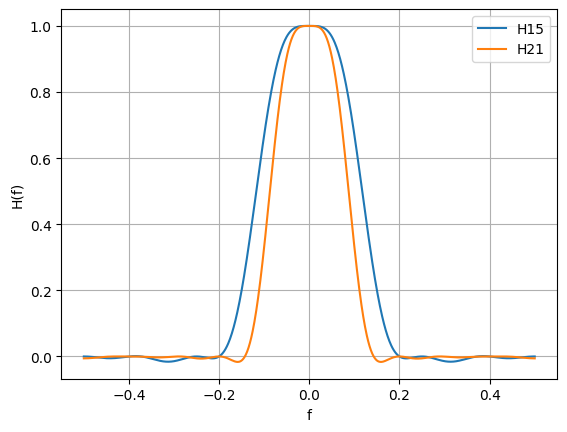

In [5]:
plt.xlabel('f')
plt.ylabel('H(f)')
plt.plot(f, H2(320, [74, 134, 92, 42, 6, -10, -12, -6], f), label='H15')
plt.plot(f, H2(350, [60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2], f), label='H21')
plt.legend()
plt.grid(True)
plt.show()

**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
В этом случае мы можем наблюдать более гладкое подавление высоких частот.

При увеличении кол-ва точек сглаживания:
* Ширина области для которой $H(f)>0$ сужается, что говорит о том что все меньше пропускается  диапопазон начиная с низких частот.   
* Колебания имеют меньшую амплитуду.
* Кривизна вблизи 0 увеличивается, фильтр начинает работать **жестче**



### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

$$D=10\lg(\frac{y_n}{s_n})=20\lg(H(f))$$

Отсюда $y_n=s_n*10^{0.05D}$, то есть значение $D=n$ будет определять усиление входного сигнала $s_n$ в $10^{0.05n}$ раз.

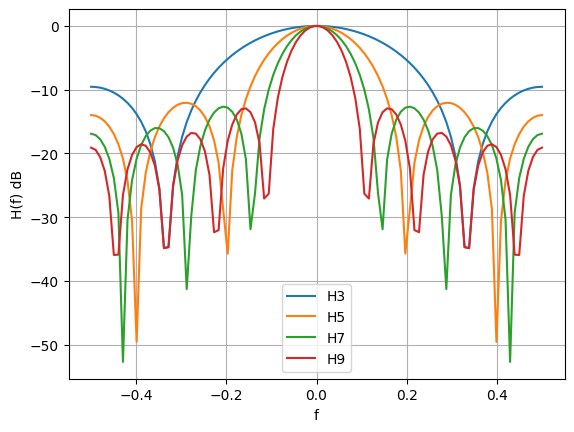

In [6]:
for i in range(3, 10, 2):
  plt.plot(np.linspace( - 0.5,  0.5, 100), 20 * np.log10(np.abs(H(i, np.linspace( - 0.5,  0.5, 100))) + 1e-10), label=f'H{i}')
plt.grid(True)
plt.xlabel('f')
plt.ylabel('H(f) dB')
plt.legend()
plt.show()

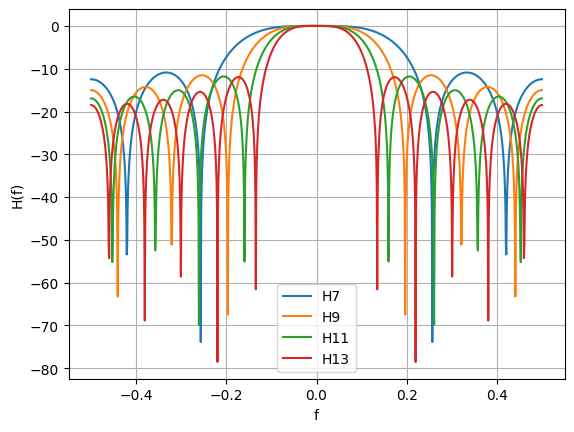

In [7]:
plt.xlabel('f')
plt.ylabel('H(f)')
plt.plot(f, 20 * np.log10(np.abs(H2(21, [7, 12, 6, -4], f)) + 1e-10), label='H7')
plt.plot(f, 20 * np.log10(np.abs(H2(231, [59, 108, 78, 28, -42], f)) + 1e-10), label='H9')
plt.plot(f, 20 * np.log10(np.abs(H2(429, [89, 168, 138, 88, 18, -72], f)) + 1e-10), label='H11')
plt.plot(f, 20 * np.log10(np.abs(H2(143, [25, 48, 42, 32, 18, 0, -22], f)) + 1e-10), label='H13')
plt.legend()
plt.grid(True)
plt.show()

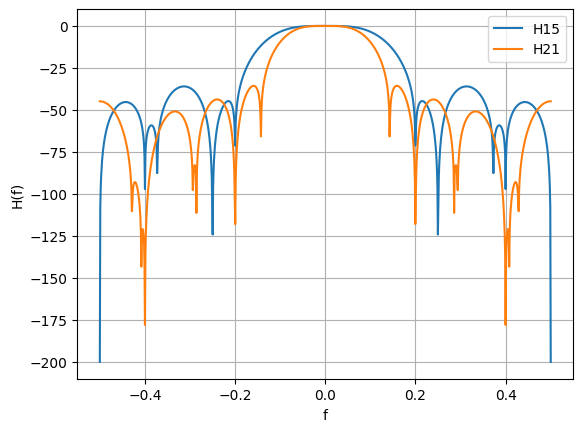

In [8]:
plt.xlabel('f')
plt.ylabel('H(f)')
plt.plot(f, 20 * np.log10(np.abs(H2(320, [74, 134, 92, 42, 6, -10, -12, -6], f)) + 1e-10), label='H15')
plt.plot(f, 20 * np.log10(np.abs(H2(350, [60, 114, 94, 66, 36, 12, -4, -10, -10, -6, -2], f)) + 1e-10), label='H21')
plt.legend()
plt.grid(True)
plt.show()

### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

С увеличением степени сглаживания полинома мы наблюдаем следующие изменения:

* Увеличивается ширина "колокола", что указывает на увеличение окна низких частот, которые передаются без искажений или с меньшими искажениями.
* Спуск с "колокола" становится более резким, что свидетельствует о более четкой границе фильтрации частот.


Фильтры на основе формул Спенсера отличаются от фильтров на основе полиномов следующим образом:

* В отличие от фильтров на основе полиномов, фильтры на основе формул Спенсера имеют более равномерное подавление высоких частот.
* Окно пропускания низких частот в них заметно меньше, чем в фильтрах на основе полиномов.
* Кроме того, у них имеется еще более резкий спуск, что указывает на более четкую границу фильтрации частот.

## Выводы

В ходе работы были выведены формулы передаточной функции для различных типов фильтров, включая сглаживание прямой, полином второй степени, полином четвертой степени и формулы Спенсера, при разном количестве точек.

Для каждого случая были проанализированы частотные свойства передаточных функций при разном количестве точек. В результате было выяснено, что независимо от типа фильтра, увеличение количества точек ведет к следующим изменениям:

* Снижается диапазон пропускания низких частот. Фильтр более строго фильтрует низкие частоты, либо менее эффективно уменьшает сигнал, либо сильнее подавляет их.
* Частота колебаний передаточной функции возрастает на средних и высоких частотах.
Амплитуда колебаний на высоких частотах уменьшается.


Также был проведён сравнительный анализ между фильтрами на основе полиномов и формул Спенсера и сделаны следующие выводы:

* Фильтр на основе формул Спенсера эффективнее и равномернее подавляет высокие частоты.
* При этом диапазон пропускающих низких частот значительно меньше в фильтрах на основе полиномов.


В итоге был проведён анализ частотных характеристик известных формул сглаживания временных рядов и сделали соответствующие выводы.